
##Aim is to understand the outcomes of different opensource OCR and understand their limitations and advantages


In [ ]:
''' 1. TESSERACT OCR , 2. KERAS OCR, 3. EASY OCR, 4. PADDEL OCR,  5. DONUT OCR
 We will be checking the outcome on clean text image, clean hand written, blur text image, skewed text image, tabular data
 what if text contains multiple languages'''

' 1. TESSERACT OCR , 2. KERAS OCR, 3. EASY OCR, 4. PADDEL OCR,  5. DONUT OCR\n We will be checking the outcome on clean text image, clean hand written, blur text image, skewed text image, tabular data\n what if text contains multiple languages'

# Word Error Rate

In [ ]:
#https://www.rev.com/blog/resources/what-is-wer-what-does-word-error-rate-mean
'''The WER calculation is based on a measurement called the “Levenshtein distance.”
The Levenshtein distance is a measurement of the differences between two “strings.”

To put it in a simple formula, Word Error Rate = (Substitutions + Insertions + Deletions) / Number of Words Spoken

But how do you add up those factors? Let’s look at each one:

A substitution occurs when a word gets replaced (for example, “noose” is transcribed as “moose”)
An insertion is when a word is added that wasn’t said (for example, “SAT” becomes “essay tea”)
A deletion happens when a word is left out of the transcript completely (for example, “turn it around” becomes “turn around”)'''

#Character Error Rate

In [ ]:
# https://readcoop.eu/glossary/character-error-rate-cer/
'''This value indicates the percentage of characters that were incorrectly predicted.
 The lower the value, the better the performance of the ASR system with a CharErrorRate of 0 being a perfect score.

 The Character Error Rate (CER) compares, for a given page, the total number of characters (n),
 including spaces, to the minimum number of insertions (i),
 substitutions (s) and deletions (d) of characters that are required to obtain the Ground Truth result.
  The formula to calculate CER is as follows: CER = [ (i + s + d) / n ]*100

'''

In [ ]:
#https://github.com/jitsi/jiwer
#https://pypi.org/project/jiwer/2.5.1/
!pip install jiwer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 17.9 MB/s eta 0:00:00


In [ ]:
import cv2
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
from jiwer import wer,cer

In [ ]:
def get_the_error_rate(GT, extraction):
  word_error_rate = wer(GT, extraction)
  char_error_rate = cer(GT, extraction)

  print("Word_Error_Rate: ",word_error_rate)
  print("Char_Error_Rate: ",char_error_rate)


##TESSERACT OCR

In [ ]:
# GIT LINK - https://github.com/tesseract-ocr/tesseract
# blog post - https://bhadreshpsavani.medium.com/how-to-use-tesseract-library-for-ocr-in-google-colab-notebook-5da5470e4fe0
#Tesseract was originally developed at Hewlett-Packard Laboratories Bristol UK and at Hewlett-Packard Co,
#Greeley Colorado USA between 1985 and 1994, with some more changes made in 1996 to port to Windows, and
#some C++izing in 1998. In 2005 Tesseract was open sourced by HP. From 2006 until November 2018 it was developed by Google.

#Installing Pytesseract and tesseract-OCR
!sudo apt install tesseract-ocr
!pip install pytesseract

In [ ]:
# taking first page of first chapter of book named MONK WHO SOLD HIS FERRARI
image_path_in_colab="CLear_plane_text.png"
image_path_in_colab ="pasted.png"
GT= "CHAPTER ONE The Wake-Up Call He collapsed right in the middle of a packed courtroom. He was one of this country's most distinguished trial lawyers. He was also a man who was as well known for the three-thousand-dollar Italian suits which draped his well-fed frame as for his remarkable string of legal victories. I simply stood there, paralyzed by the shock of what I had just witnessed. The great Julian Mantle had been reduced to a victim and was now squirming on the ground like a helpless infant, shaking and shivering and sweating like a maniac. Everything seemed to move in slow motion from that point on."

In [ ]:
import pytesseract
teserract_extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
teserract_extractedInformation = teserract_extractedInformation.replace('\n', ' ')
print(teserract_extractedInformation)
#print(pytesseract.image_to_boxes(Image.open(image_path_in_colab)))
get_the_error_rate(GT, teserract_extractedInformation)

#Detect Langauge other than English
#French text image to string
#extractedInformation = pytesseract.image_to_string(Image.open('test-european.jpg'), lang='fra')
#print(extractedInformation)
#Specifying language in the above function by lang argument we can change the language text to be detected.

   Fixed data  Pertime © Gross salary Hourly salary Tax credit  “Table color  Pay period Minimum sary ‘Annual selary BT Percentage BT Cat. value car  Period 100.00 561728 zai Toepassen wt  Mesnd e180 50,000.00 4925 0.00  Basis  Salary SW Salary LH Salary 2W  Tax credit  Wage tax Normal rate Special rate Beneft ule Beneft  Period 3,984.38 3,984.38 3,984.38 221.92  4,129,17 0.00  Cumulative 26.58.38 26.58.38 26.58.38 4,331.52  6775.02 41,856.10  Not applied this period  00  00  Days/hours  Period sv Days 20.00 Days worked 20.00 Hours worked 173.33, Sickness days 0.00 Reservations  Holiday allowance 449.38, Leavehours 1665  Parentalleave 0.00  Cumulative 129.00 129.00 10,3988 0.00  449.38 208.88 0.00    
Word_Error_Rate:  1.0
Char_Error_Rate:  0.9263502454991817


In [ ]:
# IT considers the special symbols,
# it is case sensitive as well

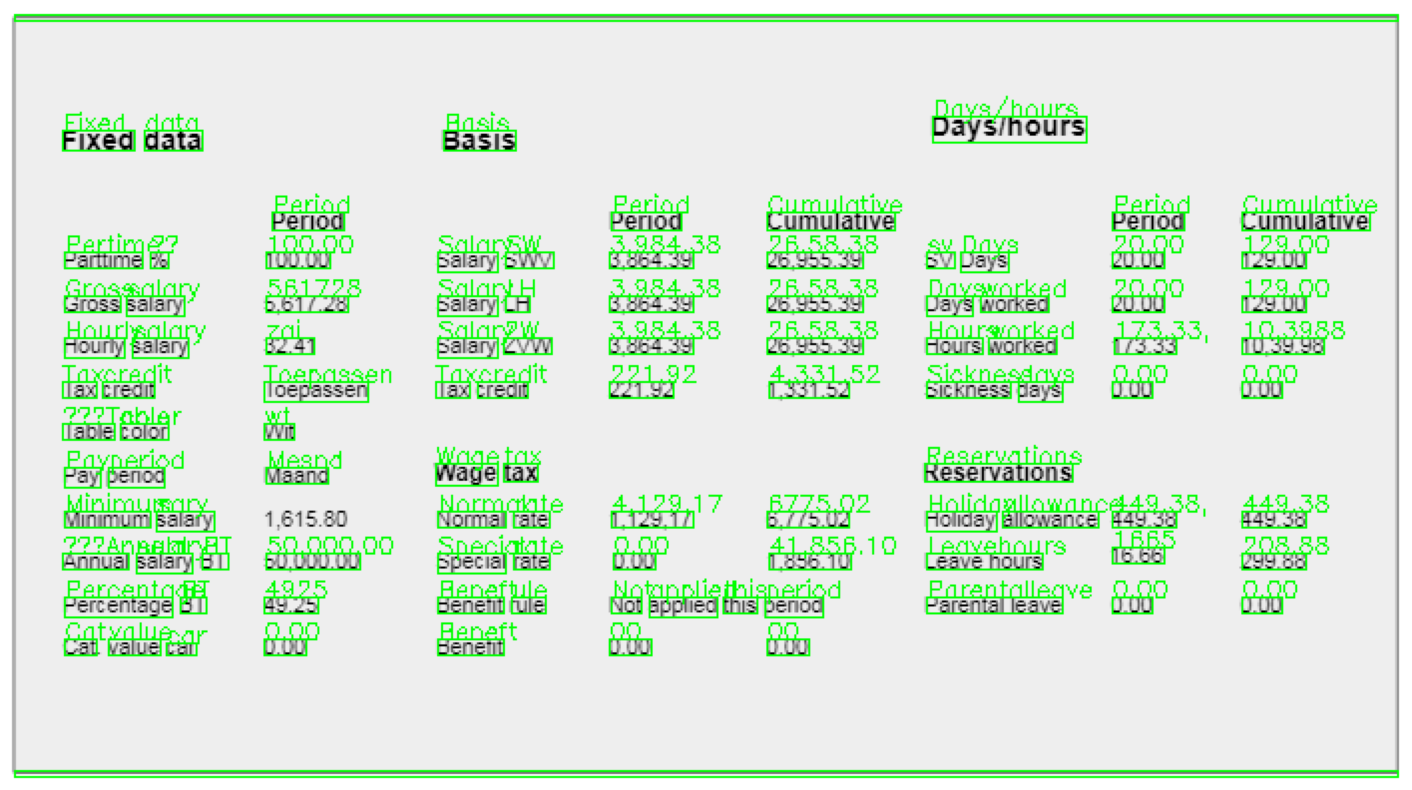

In [ ]:
# Perform bounding box detection using Tesseract's built-in capabilities
image = cv2.imread(image_path_in_colab)
d = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
n_boxes = len(d['text'])
for i in range(n_boxes):
  if int(d["conf"][i])>0:
    if int(d['conf'][i]) > 0:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        image = cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 1)
        image = cv2.putText(image, d["text"][i], (x,y ), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0, 255, 0), 1)

plt.figure(figsize=(20,10))

plt.axis("off")
plt.imshow(image)

#KERAS OCR


In [ ]:
!pip install keras-ocr -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 47.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 6.0 MB/s eta 0:00:00


In [ ]:
import keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5


Instructions for updating:
Use `tf.image.resize(...method=ResizeMethod.BILINEAR...)` instead.


Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
keras_results = pipeline.recognize([image_path_in_colab])
# Takes comparitvely longer time

5/5 [==============================] - 44s 7s/step


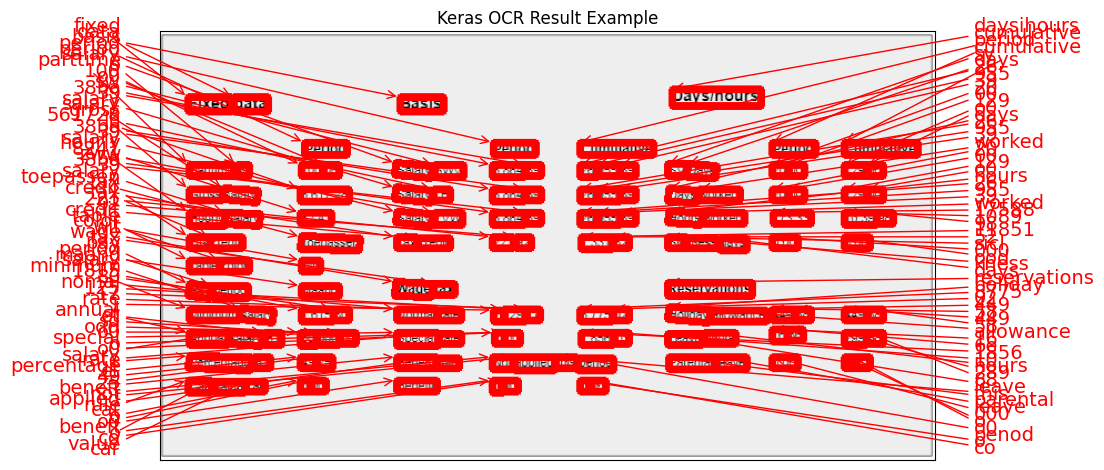

In [ ]:
# plot the text predictions
image = cv2.imread(image_path_in_colab)

fig, ax = plt.subplots(figsize=(10, 10))
keras_ocr.tools.drawAnnotations(plt.imread(image_path_in_colab), keras_results[0], ax=ax)
ax.set_title('Keras OCR Result Example')
plt.show()

In [ ]:
keras_result_string = ""
for ele in keras_results[0]:
   keras_result_string = keras_result_string+" "+ ele[0]
keras_result_string

get_the_error_rate(GT.lower(), keras_result_string.lower())
# Case sensitivity is lost
# new lines is not detected
# Does not consider the special chars and punctuations

Word_Error_Rate:  0.6635514018691588
Char_Error_Rate:  0.46808510638297873


#EASY OCR

In [ ]:
#https://medium.com/@adityamahajan.work/easyocr-a-comprehensive-guide-5ff1cb850168

In [ ]:
pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 33.1 MB/s eta 0:00:00


### EasyOCR supports multiple languages, and you can install language models for the specific languages you need.
### By default, English (en) is installed. You can add additional languages with — model_dir or specify them in your code when initializing the EasyOCR reader.

### For example, to install Chinese (chinese), you can use:

### pip install easyocr[chinese]

In [ ]:
import easyocr
reader = easyocr.Reader(['en', 'es'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
#result = reader.readtext('CLear_plane_text.png')
easy_ocr_result =""

result_ = reader.readtext(image_path_in_colab)
for (bbox, text, prob) in result_:
    print(f'Text: {text}, Probability: {prob}')
    easy_ocr_result = easy_ocr_result+ " "+text

#print(easy_ocr_result)

# either paragraph false or true, the prediction is found as line or paragraph
# sepcial characters are also detected
# It is case sensitive
# provides confidence too.


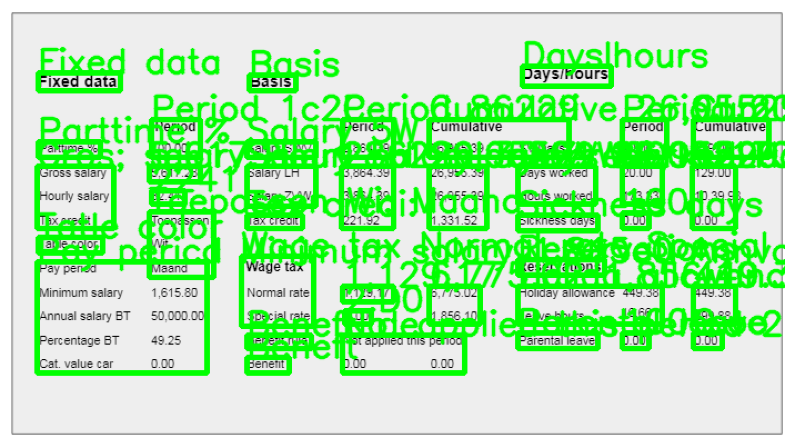

In [ ]:
result = reader.readtext(image_path_in_colab,paragraph="False")
img = cv2.imread(image_path_in_colab)
font = cv2.FONT_HERSHEY_SIMPLEX
for i in result:
  img = cv2.rectangle(img,i[0][0],i[0][2],(0,255,0),3)
  img = cv2.putText(img,i[1],i[0][0], font, 1,(0,255,0),2,cv2.LINE_AA)
plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(img)
plt.show()

In [ ]:
get_the_error_rate(GT, easy_ocr_result)

Word_Error_Rate:  0.04672897196261682
Char_Error_Rate:  0.011456628477905073


#PADDLE OCR (Parallel Distributed Deep Learning)

In [ ]:
#https://medium.com/adevinta-tech-blog/deep-dive-in-paddleocr-inference-e86f618a0937
# it includes a range of pre-trained models and tools for recognising text in images and documents, as well as for training custom OCR models
#PaddlePaddle (short for Parallel Distributed Deep Learning) is an open source deep learning platform developed by Baidu Research
#PaddleOCR is divided into two main sections:
#  -- PP-OCR, an OCR system used for text extraction from images
#  -- PP-Structure, a document analysis system which aims to perform layout analysis and table recognition

#https://miro.medium.com/v2/resize:fit:1400/format:webp/0*1mI3YTIjAut_QMrl
#https://colab.research.google.com/drive/1Xsjlbd3Kiqwu-_h-Y--gSCLHMSh0yg2w?usp=sharing#scrollTo=gYGlcb40GCRh

In [ ]:
!python3 -m pip install paddlepaddle-gpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 749.8/749.8 MB 982.1 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00


In [ ]:
!pip install "paddleocr>=2.0.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.7/465.7 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 55.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.5/398.5 kB 22.1 M

In [ ]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:14<00:00, 284kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:12<00:00, 812kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:13<00:00, 166kiB/s]

[2024/02/25 18:57:31] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

In [ ]:
paddle_result = ocr.ocr(image_path_in_colab, cls=True)
#ocr = PaddleOCR(use_angle_cls=True)

[2024/02/25 18:58:40] ppocr DEBUG: dt_boxes num : 74, elapsed : 1.4288535118103027
[2024/02/25 18:58:40] ppocr DEBUG: cls num  : 74, elapsed : 0.17536520957946777
[2024/02/25 18:58:41] ppocr DEBUG: rec_res num  : 74, elapsed : 0.3422257900238037


In [ ]:
paddle_string=""
for line in paddle_result[0]:
    paddle_string= paddle_string+" "+line[-1][0]

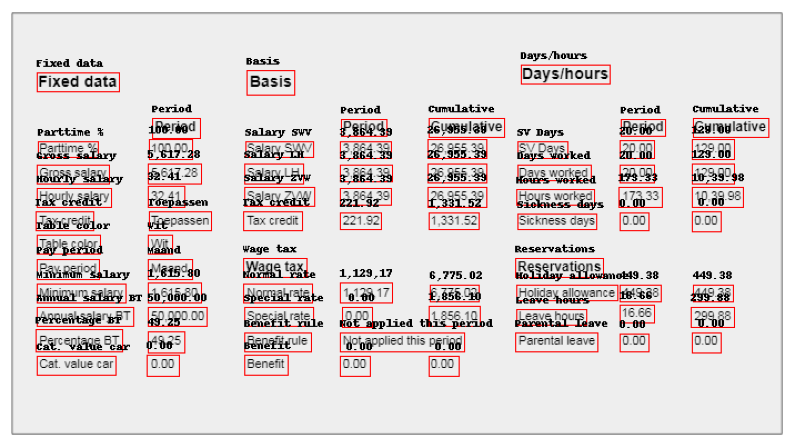

In [ ]:
import PIL
import numpy as np
image = Image.open(image_path_in_colab)
draw = PIL.ImageDraw.Draw(image)
for i, box in enumerate(paddle_result[0]):
    box = np.array(box[0]).astype(np.int32)
    xmin = min(box[:, 0])
    ymin = min(box[:, 1])
    xmax = max(box[:, 0])
    ymax = max(box[:, 1])
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin-14), f"{paddle_result[0][i][-1][0]}", fill="black", font_size= 500)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(image)

In [ ]:
get_the_error_rate(GT, paddle_string)

# it does acknowledge special characters
# it does acknoledge case sensitivity
# requires GPU
# it extracts sentences and not words

Word_Error_Rate:  0.07476635514018691
Char_Error_Rate:  0.011456628477905073



#DONUT OCR

In [ ]:
#https://colab.research.google.com/github/NielsRogge/Transformers-Tutorials/blob/master/Donut/CORD/Quick_inference_with_DONUT_for_Document_Parsing.ipynb#scrollTo=pOmnuWOiRhdV

In [ ]:
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
from transformers import DonutProcessor, VisionEncoderDecoderModel

processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")

preprocessor_config.json:   0%|          | 0.00/362 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


tokenizer_config.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/1.30M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/4.02M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/1.52k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/335 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/806M [00:00<?, ?B/s]

In [ ]:
# somehow needs image in jpg format
image = Image.open("CLear_plane_text.jpg").convert("RGB")
pixel_values = processor(image, return_tensors="pt").pixel_values

In [ ]:
import torch

task_prompt = "<s_cord-v2>"
decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt")["input_ids"]

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

outputs = model.generate(pixel_values.to(device),
                               decoder_input_ids=decoder_input_ids.to(device),
                               max_length=model.decoder.config.max_position_embeddings,
                               early_stopping=True,
                               pad_token_id=processor.tokenizer.pad_token_id,
                               eos_token_id=processor.tokenizer.eos_token_id,
                               use_cache=True,
                               num_beams=1,
                               bad_words_ids=[[processor.tokenizer.unk_token_id]],
                               return_dict_in_generate=True,
                               output_scores=True,)

# inference takes time

In [ ]:
import re

sequence = processor.batch_decode(outputs.sequences)[0]
sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token
print(sequence)

<s_menu><s_nm> The Wake-Up Call</s_nm><s_num> He collapsed right in the middle of a packed courtroom. He was one of this country's most distinguished trial lawyers. He was also</s_nm><s_num> a man who was as well known for the three-thousand-dollar Italian</s_nm><s_num> suits which draped his well-fed frame as for his remarkable string of</s_nm><s_num> legal victories. Isimply stood there, paralyzed by the shock of what</s_nm><s_num> I had just witnessed. The great Julian Mantle had been reduced to a victim and was now squirming on the ground like a helpless in-</s_nm><s_num> a</s_num><s_price> a</s_price><sep/><s_nm> fant, shaking and shivering and sweating like a manac. Everything seemed to move in slow motion from that point on.</s_menutype_cnt></s_total>


In [ ]:
string=re.sub("\<.*?\>","<>",sequence)
donut_string = string.replace("<>","")

In [ ]:
get_the_error_rate(GT, donut_string)

# it does acknowledge special characters
# it does acknoledge case sensitivity
# it extracts sentences and not words

Word_Error_Rate:  0.08411214953271028
Char_Error_Rate:  0.03273322422258593
